In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
specs = glob.glob('hst_spectra/*.dat')
specs

['hst_spectra/uz_sex_COS_FUV_1291_2017-11-15.dat',
 'hst_spectra/WD-0137-349_COS_FUV_G130M_2018-07-18:20:34:08_ldlc06s1q.dat',
 'hst_spectra/eg_uma_COS_FUV_1291_2017-12-05.dat',
 'hst_spectra/WD-1436-216_COS_FUV_G130M_2018-07-17:08:52:54_ldlc09hnq.dat',
 'hst_spectra/V-CC-CET_COS_FUV_G130M_2018-02-01:23:50:55_ldlc01xkq.dat',
 'hst_spectra/wd2317+268_COS_FUV_1291_2017-12-12.dat',
 'hst_spectra/V-V727-CAR_STIS_FUV-MAMA_E140M_2018-01-05:09:08:58_odlc02010_stitched.dat',
 'hst_spectra/V-CC-CET_COS_FUV_G130M_2018-07-22:05:40:51_ldlc51p5q.dat',
 'hst_spectra/wd1504+546_COS_FUV_1291_2018-01-22.dat',
 'hst_spectra/wd1458+171_COS_FUV_1291_2018-01-30.dat',
 'hst_spectra/eggr_38_COS_FUV_1291_2018-02-27.dat',
 'hst_spectra/lm_com_COS_FUV_1291_2015-03-08.dat',
 'hst_spectra/lm_com_COS_FUV_1291_2017-12-17.dat',
 'hst_spectra/WD-1339+606_COS_FUV_G130M_2018-07-01:06:28:59_ldlc08iqq.dat']

uz_sex_COS_FUV_1291_2017-11-15.dat


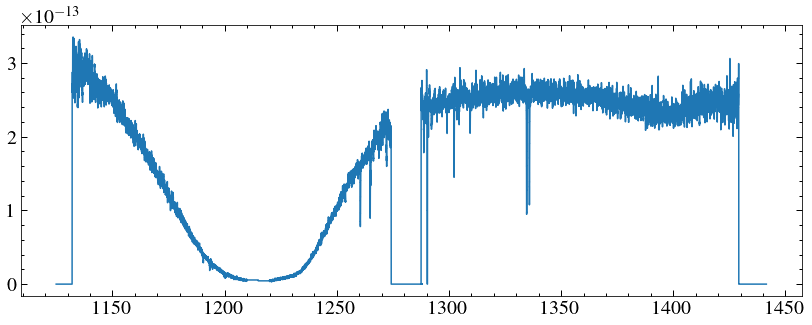

WD-0137-349_COS_FUV_G130M_2018-07-18:20:34:08_ldlc06s1q.dat


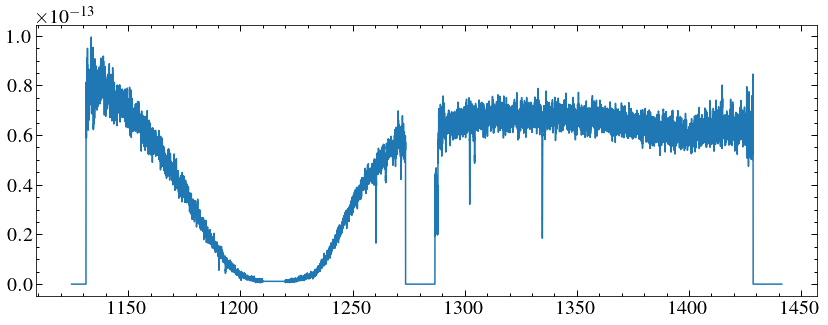

eg_uma_COS_FUV_1291_2017-12-05.dat


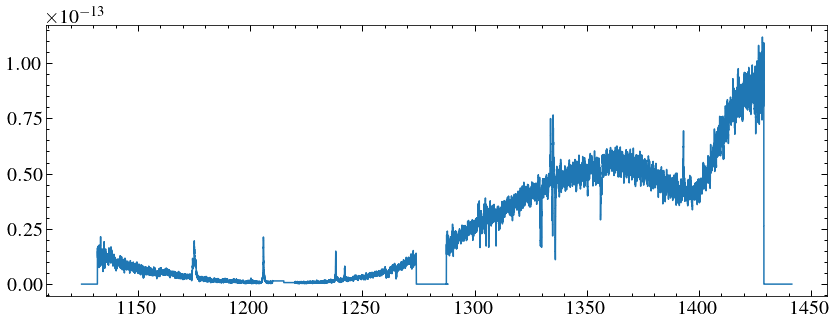

WD-1436-216_COS_FUV_G130M_2018-07-17:08:52:54_ldlc09hnq.dat


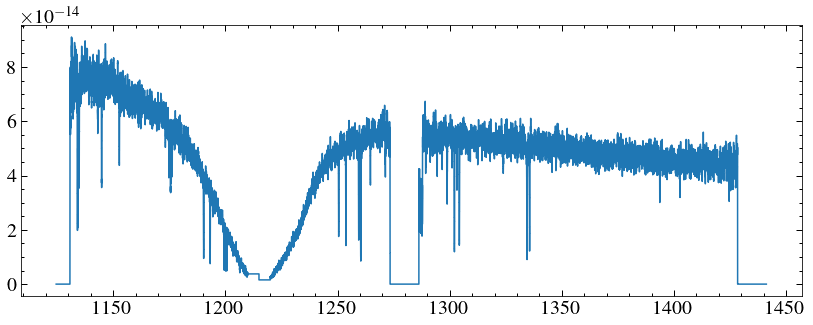

V-CC-CET_COS_FUV_G130M_2018-02-01:23:50:55_ldlc01xkq.dat


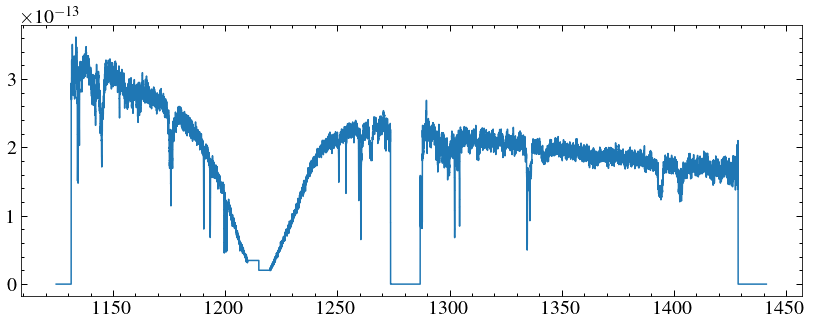

wd2317+268_COS_FUV_1291_2017-12-12.dat


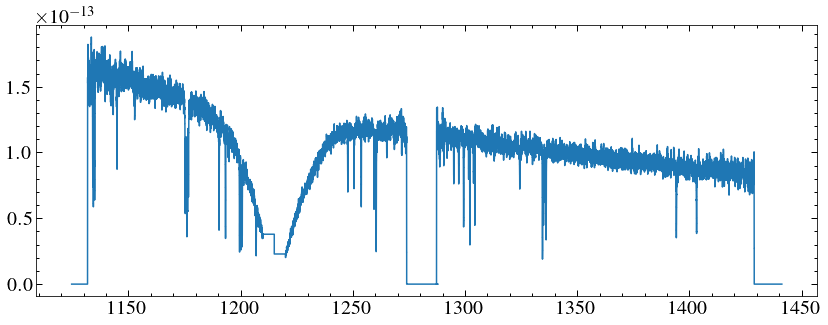

V-V727-CAR_STIS_FUV-MAMA_E140M_2018-01-05:09:08:58_odlc02010_stitched.dat


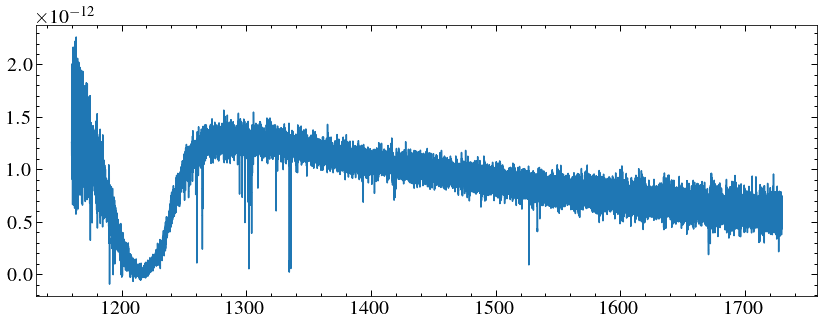

V-CC-CET_COS_FUV_G130M_2018-07-22:05:40:51_ldlc51p5q.dat


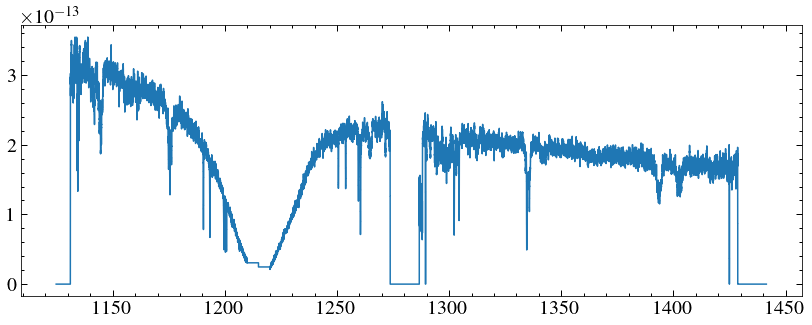

wd1504+546_COS_FUV_1291_2018-01-22.dat


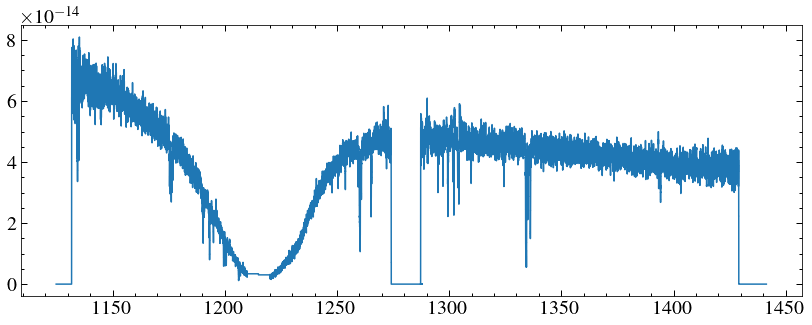

wd1458+171_COS_FUV_1291_2018-01-30.dat


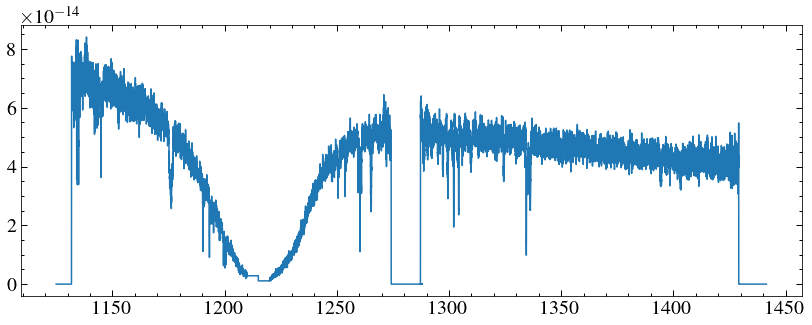

eggr_38_COS_FUV_1291_2018-02-27.dat


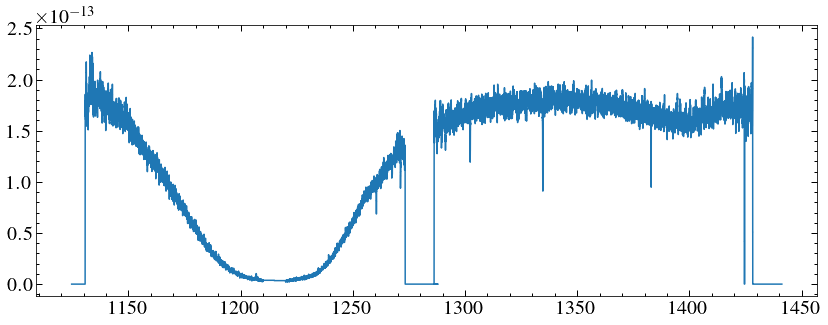

lm_com_COS_FUV_1291_2015-03-08.dat


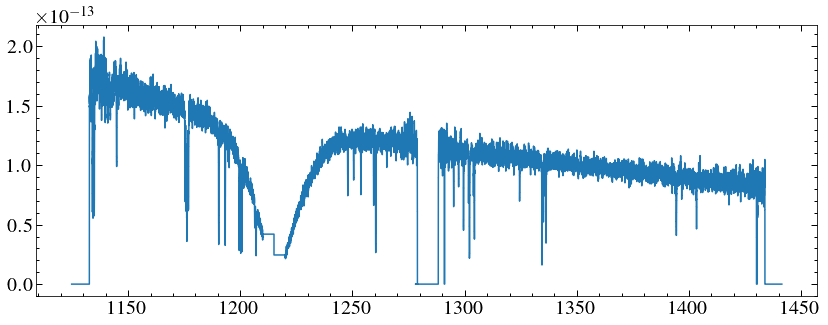

lm_com_COS_FUV_1291_2017-12-17.dat


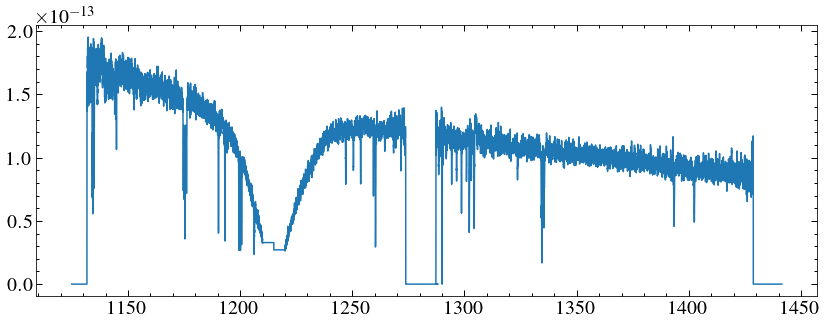

WD-1339+606_COS_FUV_G130M_2018-07-01:06:28:59_ldlc08iqq.dat


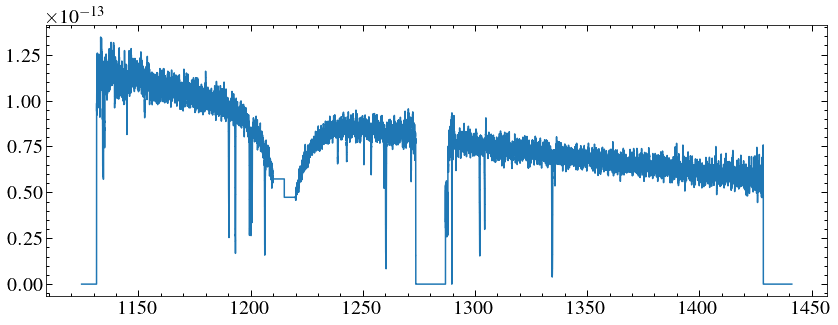

In [8]:
smooth = 5
for spec in specs:
    print(os.path.split(spec)[1])
    w, f, e = np.loadtxt(spec, unpack=True, usecols=(0,1,2))
    if 'E140M' not in spec:
        f = convolve(f,Box1DKernel(smooth))
        e = convolve(e,Box1DKernel(smooth))/smooth**0.5
        mask = (w < 1210) | (w > 1220)
    else:
        mask = (w > 1160)
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.show()